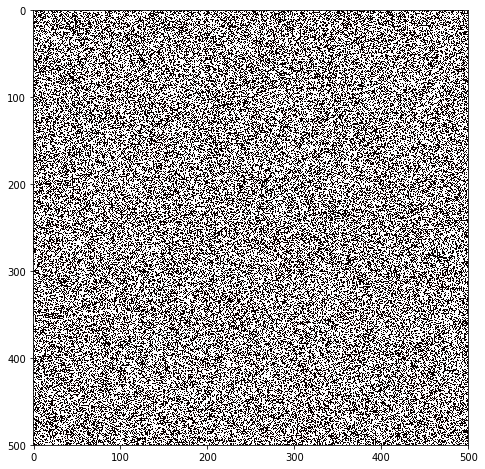

In [126]:
import numpy as np 
import matplotlib.pyplot as plt

N = 500
p = 0.59275
#np.random.seed(69)
L = np.random.random([N,N])
plt.rcParams["figure.figsize"] = [16,8]
plt.imshow(L < p, cmap = 'hot')


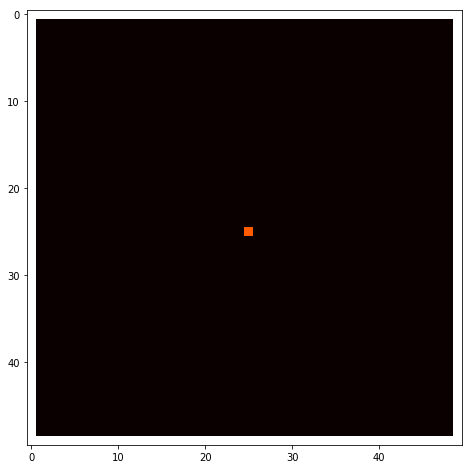

In [135]:
def Lattice(N):
    lattice = np.zeros((N,N))
    'occupy the center'
    lattice[N//2,N//2]=1
    lattice[:,0] = lattice[0,:] = lattice[:,-1] = lattice[-1,:] = 2
    return lattice

plt.imshow(Lattice(50), cmap = "hot")   

Mass = 183678.0


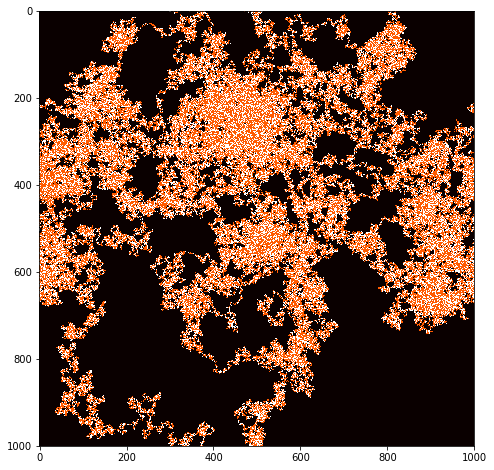

In [166]:
def mass(lattice): 
    elements, counts = np.unique(lattice, return_counts = 1)      
    return np.mean(counts[elements!=0])

def nextstep(x,y):
    adjacents = np.array([np.array([ 0,  1]), np.array([ 1,  0]), np.array([-1,  0]), np.array([ 0, -1])])
    choice = np.random.randint(0,4)
    x += adjacents[choice][0]
    y += adjacents[choice][1]
    return x,y

def percolatingcluster(p,N,iterations):
    'for each iteration'
    point = 1
    'creates a lattice with a defined center and zero border'
    lattice = Lattice(N)
    
    'parameter'
    'initial coordinates
    x = 0
    y = 0
    
    for i in range(iterations):
        'random motion to the adjacent sides'
        x,y = nextstep(x,y)
        'and the point has a probability'
        probability = np.random.random()
        'while the point, starting from the coordinate, is within the lattice shape...'
        if np.abs(N//2+x) < N and np.abs(N//2+y) < N:
            if lattice[N//2 + x][N//2 + y] == 0: #undefined
                'and its probability is less the the variable p'
                if probability < p: 
                    'occupy the undefined point'
                    lattice[N//2 + x][N//2 + y] = 1
                    'that one point contributed to the mass'
                    point +=1
                else: 
                    'when it more probable than p, set the newpoint to vacant'
                    lattice[N//2 + x][N//2 + y] = 2
            else: 
                'repeat the step until'
                continue
    
    #print('Number of occupied points =', count)
    #plt.imshow(lattice,cmap ='hot')
    #plt.show()
    Mass = mass(lattice)
    #print('mass =', Mass)
    return Mass, lattice

np.random.seed(32)
m, plot = percolatingcluster(0.59275,1000,2000000)
plt.imshow(plot, cmap = 'hot')
print('Mass =', m)

1021.9
1022.8
1021.5
1021.4
1021.6
1022.2
1024.1
1022.0
1021.4
1021.1
1022.4
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [1021.9, 1022.8, 1021.5, 1021.4, 1021.6, 1022.2, 1024.1, 1022.0, 1021.4, 1021.1, 1022.4]


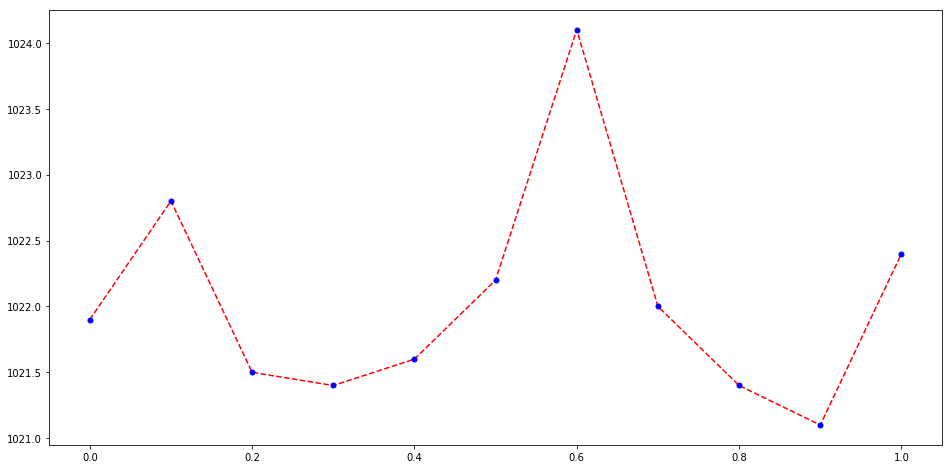

In [191]:
def threshold(n):
    trials = 5
    probabilities = np.arange(0, 1.1, 0.1)
    clustersizes = []
    for w in range(0,11):
        
        size_p = []
        #clustersizes.append(Mass)
        for _ in range(trials):
            Mass, lattice = percolatingcluster(probabilities[w],n,100)
            
            #print('trial = ', len(size_p))
            #print('p= ', probabilities[w])
            #__, __, clustersize = labelling(n,p)
            size_p.append(Mass)
        
        if len(size_p) != 0:
            print(np.mean(size_p))
            clustersizes.append(np.mean(size_p))
        else:
            clustersizes.append(0)
            
           

    #print(probabilities, clustersizes)
    return probabilities, clustersizes



x, y = threshold(500)
print(x,y)
plt.plot(x,y, 'r--')
plt.plot(x,y, 'b.', markersize = 10)

1023.5
1025.2
1024.6
1024.8
1024.7
1023.8
1026.3
1023.1
1018.2
1022.3
1023.2
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [1023.5, 1025.2, 1024.6, 1024.8, 1024.7, 1023.8, 1026.3, 1023.1, 1018.2, 1022.3, 1023.2]


Text(0,0.5,'$\\mathbf{M}$')

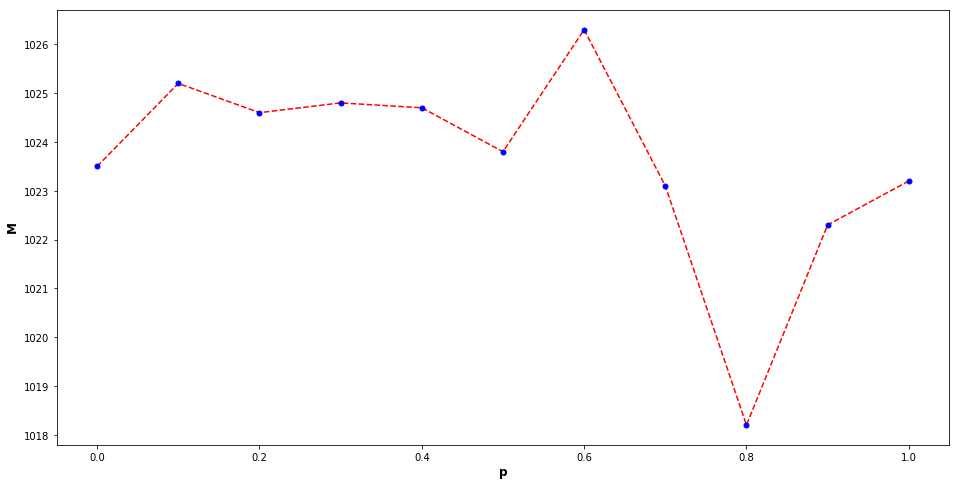

In [206]:
np.random.seed(69)
x, y = threshold(500)
print(x,y)
plt.plot(x,y, 'r--')
plt.plot(x,y, 'b.', markersize = 10)
plt.xlabel('$\mathbf{p}$', fontsize = 12) #Concentration
plt.ylabel('$\mathbf{M}$', fontsize = 12) #Cluster Mass   
#Percothresholdplot()

TypeError: 'NoneType' object is not subscriptable

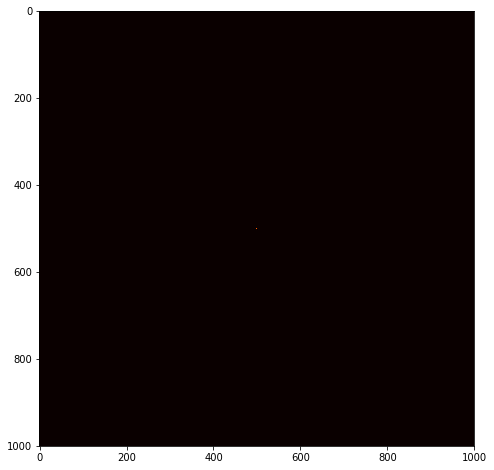

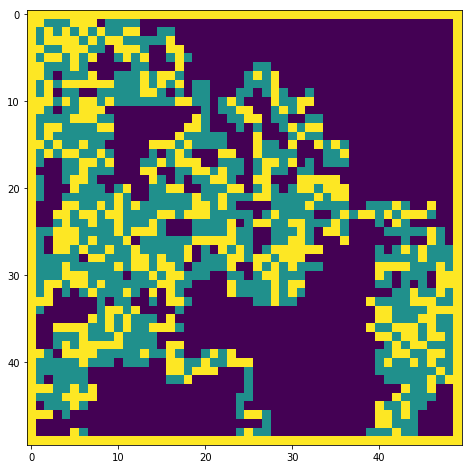

In [209]:
m2, plot2 = percolatingcluster(0.59275,50,10000)
plt.imshow(plot2)

In [211]:
import matplotlib.animation as anim
fig = plt.figure()
im = []
count = 1
lattice = Lattice(50)
x = y = 0
p = 0.59275

for i in range(10000):
    r = np.random.random()
    x,y = nextstep(x,y)
    if np.abs(N//2+x) < N and np.abs(N//2+y) < N:
        if lattice[N//2 + x][N//2 + y] == 0:
            if r < p: 
                lattice[N//2 + x][N//2 + y] = 1
                count +=1
            else: lattice[N//2 + x][N//2 + y] = 2
        else: 
            continue
    im.append([plt.imshow(lattice, animated=True, cmap = 'hot')])
    
percolation = anim.ArtistAnimation(fig, im, interval = 50, blit = True)
percolation.save("percolation.mp4", writer = 'ffmpeg')
    

IndexError: index 249 is out of bounds for axis 0 with size 50

NameError: name 'plt' is not defined